In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("D:/Machine Learning/Machine Learning/Datasets/Titanic/train.csv")
test = pd.read_csv("D:/Machine Learning/Machine Learning/Datasets/Titanic/test.csv")

In [3]:
passengerId = test.iloc[:,0].values

In [6]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# Convert Embarked column into integer column

train['Embarked'] =  train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})

In [14]:
train['Embarked']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [18]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# SimpleImputer for filling NaN values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [16]:
train['Embarked'] = imputer.fit_transform(train[['Embarked']])

In [19]:
test['Fare'] = imputer.fit_transform(test[['Fare']])

In [20]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [21]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [22]:
# For Age column
train['Age'] = imputer.fit_transform(train[['Age']])

In [23]:
test['Age'] = imputer.fit_transform(test[['Age']])

In [24]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [25]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [26]:
imputer.statistics_

array([30.27259036])

Combine `SibSp` and `Parch` and make a family column

In [27]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0


Categorical values into numerical values

In [31]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked','SibSp','Parch'], drop_first=True)
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked','SibSp','Parch'], drop_first=True)

In [32]:
train.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,False,True,True,...,False,False,False,False,False,False,False,False,False,False


Drop Columns

In [33]:
train.drop(columns=['PassengerId', 'Name','Ticket','Cabin'], inplace=True)
test.drop(columns=['PassengerId', 'Name','Ticket','Cabin'], inplace=True)

In [34]:
print(train.shape)
print(test.shape)

(891, 21)
(418, 20)


In [35]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_0.36220472440944884,Embarked_1.0,Embarked_2.0,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,38.0,71.2833,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,26.0,7.9250,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,35.0,53.1000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,8.0500,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# split data in X & y

X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

In [44]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape

(712, 20)

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = decision_clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597765363128491

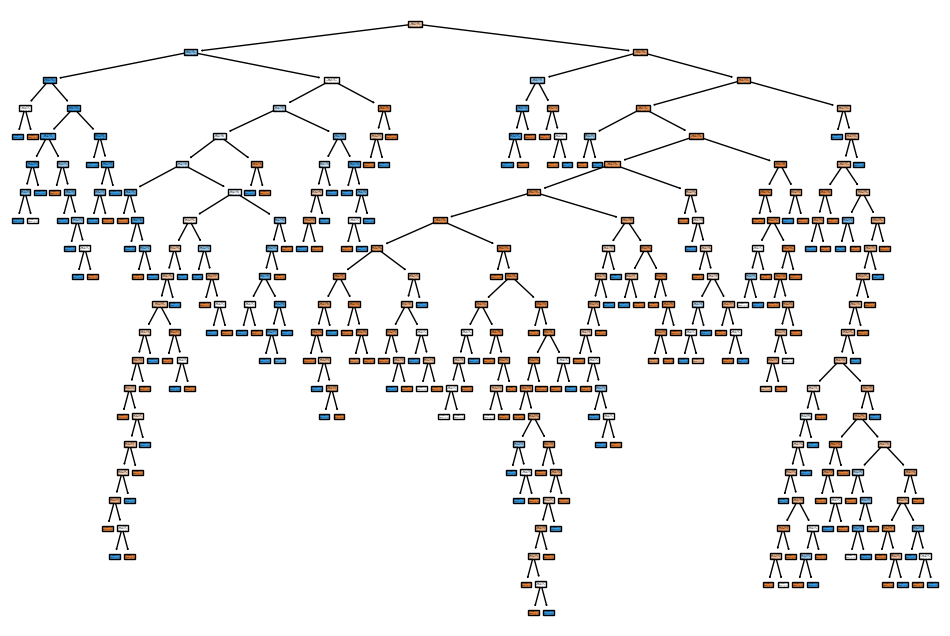

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_clf, filled=True)
plt.show()

In [52]:
# SVC 
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [53]:
y_pred_svm = svm_clf.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_svm)

0.6536312849162011

Let's use `GridSearchCV` for hyperparameter tuning

In [68]:
# Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3,4,5,6,7,None]}
grid_search = GridSearchCV(decision_clf, param_grid=param_grid, cv=5,n_jobs=-1) # `n_jobs=-1` to use all core of my cpu 

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, None]})

In [69]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
grid_search.best_score_

0.8159755737220526

In [71]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [97]:
decision_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7)
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [98]:
y_pred_tree = decision_clf.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred_tree)

0.8100558659217877

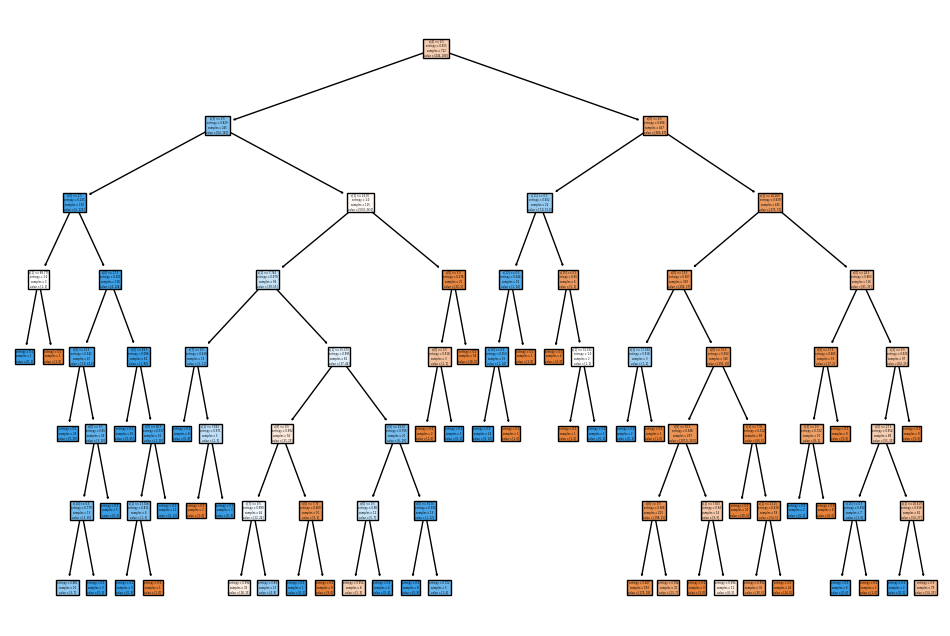

In [100]:
plt.figure(figsize=(12, 8))
plot_tree(decision_clf, filled=True)
plt.show()

In [103]:
test_data = test.iloc[:,:].values

In [104]:
y_final = decision_clf.predict(test_data)

In [106]:
y_final.shape

(418,)

In [107]:
final_data = pd.DataFrame()

In [108]:
final_data['passengerId'] = passengerId
final_data['Survived'] = y_final

In [109]:
final_data.head(10)

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [110]:
final_data.to_csv('titanic_submission2.csv', index=False)